In [40]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sklearn
import graphviz
import joblib
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition,datasets,preprocessing,svm,metrics
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import RANSACRegressor,HuberRegressor,LinearRegression
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,classification_report,r2_score,f1_score,jaccard_score,jaccard_similarity_score,accuracy_score,confusion_matrix,silhouette_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.externals.six import StringIO
from IPython.display import SVG
from sklearn.cluster import KMeans,MiniBatchKMeans,SpectralClustering,AgglomerativeClustering,DBSCAN
from IPython.display import IFrame
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix


In [41]:
pizza = pd.read_csv("Pizza.csv")
pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [42]:
X = pizza.iloc[:, :-1].values
y = pizza.iloc[:, -1].values

In [43]:
pizza.shape

(300, 9)

In [44]:
# How many Labels in this dataset

labels = pizza['brand']  # brand -- Pizza brand (class label)
classes = pizza['brand'].unique()
print(classes)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']


In [45]:
# Count labels

pizza['brand'].value_counts()


H    33
J    32
D    32
B    31
F    30
G    29
A    29
I    29
E    28
C    27
Name: brand, dtype: int64

In [46]:
# Transformation
# Replace Lablels with values
le1 = preprocessing.LabelEncoder()
pizza['brand'] = le1.fit_transform(pizza['brand'])
labels = pizza['brand']
classes = pizza['brand'].unique()
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [47]:

pizza['brand'].value_counts()

7    33
9    32
3    32
1    31
5    30
8    29
6    29
0    29
4    28
2    27
Name: brand, dtype: int64

In [48]:
pizza_no_id = pizza.drop(columns='id').copy() # df.drop(df.columns[['A', 'B']], axis=1, inplace=True)
pizza_no_id.head(2)

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84


In [49]:
pizza_no_id.shape


(300, 8)

In [50]:
# Checking for Null pizza_no_id, against each label, and find their Sum 
pizza_no_id.isnull().sum()

brand     0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [51]:
# Dataypes for each pizza_no_id
pizza_no_id.dtypes

brand       int64
mois      float64
prot      float64
fat       float64
ash       float64
sodium    float64
carb      float64
cal       float64
dtype: object

In [52]:
# Drop the Coloumn 'brand' and Create it's one copy and saved it in a variable

pizza_no_brand = pizza_no_id.drop(columns='brand').copy()
pizza_no_brand.head(3)

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95


In [53]:
pizza_no_brand.shape


(300, 7)

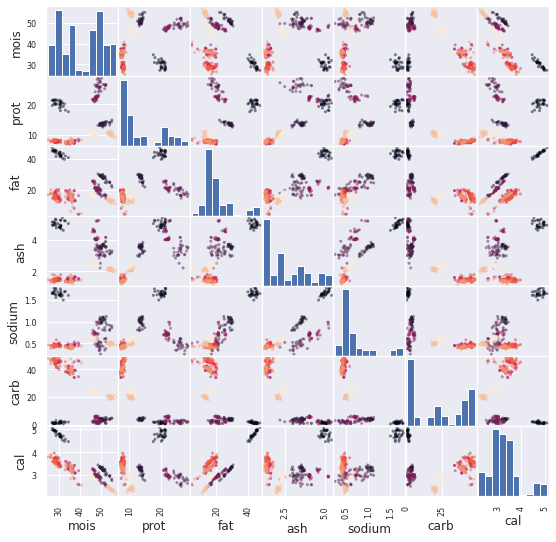

In [54]:
# Assigning the colors to the different pizza brands such that I don't have to guess from the table.
# For example, dark grey is brand = 0.

d = pd.plotting.scatter_matrix(pizza_no_brand, c = pizza.brand, figsize = (9, 9))


In [55]:
# I grouped the data by stats and not by variables: mean for mois,prot,etc; std for mois,prot,etc

statsBrand = pizza_no_id.groupby('brand').agg({'mean', 'std'}).T
statsBrand


brand                0          1          2  ...          7          8          9
mois   mean  29.966207  51.307742  49.477407  ...  35.825152  54.592759  46.035000
       std    1.955413   1.728696   1.509749  ...   1.382209   0.979143   1.395033
prot   mean  20.107241  13.638710  26.025556  ...   7.894545  10.383103  10.566250
       std    1.079441   0.509913   1.205728  ...   0.422604   0.543120   0.643658
fat    mean  43.446897  27.620323  19.171111  ...  14.291515  13.060690  16.324062
       std    1.863102   2.182310   2.425016  ...   3.589726   0.919087   1.130172
ash    mean   5.014483   3.463548   3.283333  ...   1.406061   2.098276   2.364688
       std    0.204443   0.237817   0.409042  ...   0.129806   0.075691   0.096352
sodium mean   1.656207   0.984839   0.464815  ...   0.416061   0.487241   0.614375
       std    0.064665   0.098009   0.091120  ...   0.022492   0.023588   0.041109
carb   mean   1.486897   3.969677   2.046296  ...  40.583939  19.865517  24.735938
       std    0.619724   0.614456   0.818653  ...   2.605006   0.956122   1.055975
cal    mean   4.773793   3.190968   2.848889  ...   3.224545   2.384138   2.878437
       std    0.163629   0.171976   0.176294  ...   0.220809   0.072777   0.098737

[14 rows x 10 columns]

In [56]:
# Scaling and Transform the Pizza num brand coloumn

sc_x = StandardScaler()
sc_x.fit(pizza_no_brand.values)
X_scaled = sc_x.transform(pizza_no_brand.values)
X_scaled.shape

(300, 7)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]

The first two components explain ~93% of the variability in the types of pizza. Let's visualize it:


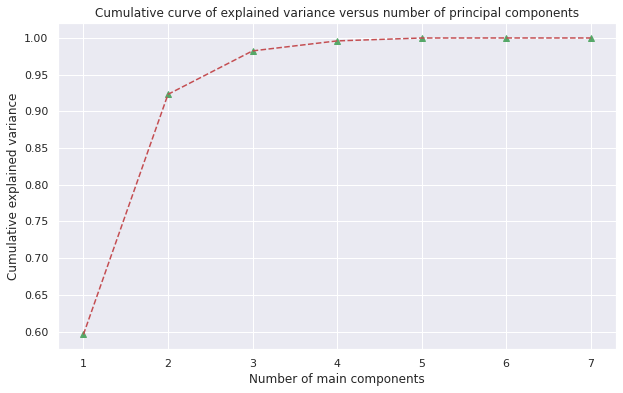

In [60]:
# Applying the PCA

sklearn_pca = PCA(n_components = None) # Mas o menos se asigna un componente por variable aunque no son los mismos.
sklearn_transf = sklearn_pca.fit_transform(X_scaled)
varianza_expl = sklearn_pca.explained_variance_ratio_
print(varianza_expl)
#s = list(zip(varianza_expl, pizza_no_brand.columns)) # No hacer zip porque no es correcto
print()
print("The first two components explain ~93% of the variability in the types of pizza. Let's visualize it:")
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()